<html>
  <h1 align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Llamados Atendidos de Violencia Familiar Unificado con Series Temporales
  </h1>
<hr>
  <h2 align="center";>
  Trabajo Práctico 1 - Análisis y Visualización
  </h2>
</html>

## Mentora:
- Isabel Rivadero

## Integrantes:
- Rinaudo, Eleana
- Sulca, Anahí

## Descripción

Los datos corresponden a información recopilada correspondiente a los llamados de todo el país atendidos por los y las profesionales del 137 sobre casos de Violencia Familiar desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada.

Pueden consultar en:
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar)

El dataset contiene información de:
-  `caso id`
- `descripcion del llamante`
- `género del llamante`
- `tipo de violencia`
- `género de la víctima`
- `cantidad de victimas`
- `cantidad de agresores`
- `género del agresor`
- `relación con la víctima`
- `fecha de la llamada`
- `hora de la llamada`.

Repositorio con los datos listos para procesar:
- [Repositorio Mentoría](https://github.com/IsabelRivadero/ir-mentoria2022)

---
## Objetivo

Realizar el **análisis**, **cuantificar variables** y describir las relaciones existentes y de interés presentes en la información recopilada sobre casos de Violencia
Familiar.

Elaborar **visualizaciones** para entender mejor estas relaciones.

---
## Consignas:

1. Realizar análisis de cada columna por separado, de las combinaciones de columnas que tengan sentido dos a dos y porque les parece que tienen sentido. Si alguna relación de más de dos columnas les parece interesante,
justificar porqué y analizar.
(Excluir los datos de fechas y horas por el momento)
El análisis total debe incluir: Análisis de tipos, Conteos, Promedios, Mediana y Moda cuando correspondan los tipos de datos, con una breve descripción de lo que
se observa.

2. Visualizaciones para las relaciones que tengan información que consideren
de importancia. Al pie de cada gráfico describir lo que se observa.


---
## A modo de guía buscar responder las siguientes preguntas con el análisis:
- ¿De qué género son los/las denunciantes?
- ¿Qué relación existe con el/la agresor?  
- ¿Qué vínculo existe entre la víctima con el llamante? 
- ¿Cuál es la relación entre la derivación de la llamada y el llamante? 
- ¿Cuál es la cantidad de víctimas/agresores?

<html>
<hr>
  <h1 align="center";>
  Desarrollo
  </h1>
</html>

## Importación de librerías

Importamos la librerías que vamos a utilizar en la Mentoría.

In [43]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)
sns.set_context("talk")


## Lectura del dataset

Detalle de los llamados de todo el país atendidos por las y los profesionales de la Línea 137, de alcance nacional, sobre casos de Violencia Familiar. La unidad de análisis en este recurso es la víctima principal del caso. Cada fila identifica un llamado y su víctima principal. Corresponde al período comprendido desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada. Pueden consultar mas información en
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar).

Para poder leer nuestro dataset necesitamos descargarlo desde el [Repositorio de la Mentoría](https://github.com/IsabelRivadero/ir-mentoria2022).


In [44]:
url = "https://raw.githubusercontent.com/IsabelRivadero/ir-mentoria2022/main/llamados_atendidos_violencia_familiar_201701_202202_mentorias.csv"
df= pd.read_csv(url, parse_dates=[0])
linea137_df = df.copy()


Creamos el DataFrame que lo asignamos con la variable `linea137_df` y, además, usamos el método `pd.read_csv` que lee el dataset en Dataframe.


Veamos el contenido del DataFrame: `linea137_df`.

In [45]:
linea137_df= linea137_df.rename(columns={'Unnamed: 0': 'index'})
linea137_df.head(3)


,index,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora
0,0,344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37
1,1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42
2,2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48


Usamos el método `head()` que nos retorna las primeras filas, en este caso 3.

## Partimos de un dataframe con las siguientes características:

Con la funcion `.shape`, nos devuelve la cantidad de **filas** de nuestro conjunto de datos y el segundo valor es la cantidad de **columnas**.

In [46]:
print("Cantidad de filas:", linea137_df.shape[0])
print("Cantidad de columnas:", linea137_df.shape[1])
print("Cantidad de datos:", linea137_df.shape)


Cantidad de filas: 45703
Cantidad de columnas: 14
Cantidad de datos: (45703, 14)


La función `.columns`, nos devuelve una lista de los nombres de cada una de las **columnas** de nuestro `DataFrame`.

Es importante saber el nombre de las **columnas** de nuestro `DataFrame` así podemos trabajar con los datos de las columnas de nuestro interés y aplicar diferentes análisis para obtener conclusiones.

In [47]:
list(linea137_df.columns)


['index',
 'caso_id',
 'llamante_descripcion',
 'llamante_genero',
 'llamante_vinculo_ninios_presentes',
 'violencia_tipo',
 'victima_genero',
 'victima_cantidad',
 'agresor_cantidad',
 'agresor_genero',
 'agresor_relacion_victima',
 'llamado_derivacion',
 'llamado_fecha',
 'llamado_hora']

# Datos


- Tipo de Datos:
  - Variable Aleatoria Categóricas
    1. `llamante_descripcion`
    2. `llamante_genero`
    3. `llamante_vinculo_ninios_presentes`
    4. `violencia_tipo`
    5. `victima_genero`
    6. `agresor_genero`
    7. `agresor_relacion_victima`
    8. `llamado_derivacion`
  - Variable Aleatoria Numérica:
    1. `victima_cantidad`
    2. `agresor_cantidad`
    3. `caso_id`
  - Variables Temporales:
    1. `llamado_fecha`



Con el método `dtypes` podemos acceder a los tipos de datos del csv. 

El tipo `object` se utiliza para representar cualquier variable ordinales, `float64` para representar tipos continuos e `int64` como tipos discretos.

In [48]:
linea137_df.dtypes[:20]


index                                 object
caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
dtype: object

<html>
<hr>
  <h1 align="center";>
  Variables Aleatorias Categóricas
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>llamante_descripcion</code>
  </h1>
</html>

Describe quién realiza el llamado. Puede indicar personas o instituciones.

#### Primero vemos qué valores están tomando cada una de las variables.

In [49]:
linea137_df.llamante_descripcion.value_counts()


Víctima                                             13979
Comisaría                                           10981
Familiar                                             5889
Profesionales de la Línea 137                        3941
Otra/o sobre una situación de conflicto familiar     3719
Vecina/o                                             2507
Otra institución                                     1276
NS/NC                                                1033
Otro/a                                                883
Otro/a particular                                     641
Hospital                                              625
Agresor/a                                             167
Otra Institución                                       39
Defensoría                                             23
Name: llamante_descripcion, dtype: int64

Se observan datos sucios, repetidos en distinto orden. Por lo tanto se procede a **homogeneizar** y agruparlos en primer lugar.

In [50]:
linea137_df["llamante_descripcion"] = linea137_df[
    "llamante_descripcion"
].str.capitalize()
mapping = {
    "Otra/o sobre una situación de conflicto familiar": "Otra/o particular",
    "Otro/a": "Otra/o particular",
    "Otro/a particular": "Otra/o particular",
    "Defensoría": "Otra institución",
    " otra institución": "Otra institución",
    "Ns/nc": "NS/NC",
}
linea137_df["llamante_descripcion"] = linea137_df["llamante_descripcion"].replace(
    mapping
)
linea137_df["llamante_descripcion"].unique()


array(['Comisaría', 'Víctima', 'Familiar', 'Otra/o particular',
       'Otra institución', 'Vecina/o', 'Profesionales de la línea 137',
       'Hospital', 'NS/NC', 'Agresor/a'], dtype=object)

Quedando de la siguiente manera los datos un poco más limpios:

In [51]:
linea137_df.llamante_descripcion.value_counts()


Víctima                          13979
Comisaría                        10981
Familiar                          5889
Otra/o particular                 5243
Profesionales de la línea 137     3941
Vecina/o                          2507
Otra institución                  1338
NS/NC                             1033
Hospital                           625
Agresor/a                          167
Name: llamante_descripcion, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variables categóricas usando barras, en este caso **la descripción del llamante**.

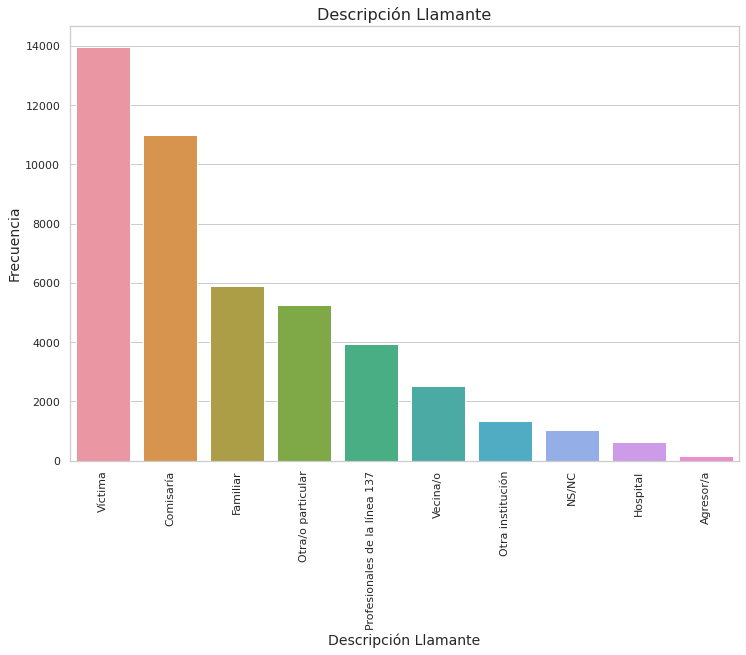

In [52]:
fig = plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_descripcion",
    order=linea137_df["llamante_descripcion"].value_counts().index,
)

plt.xlabel("Descripción Llamante", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Descripción Llamante", size=16)
plt.xticks(rotation=90)
plt.show()


In [53]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Víctima"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por la misma víctima.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Comisaría"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas desde la comisaría.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Familiar"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por un familiar de la víctima.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Otra/o particular"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por otra persona.\n -",
    round(
        len(
            linea137_df[
                linea137_df["llamante_descripcion"] == "Profesionales de la línea 137"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por un profesional de la Línea 137.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Vecina/o"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por un vecino/a de la víctima.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Otra institución"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por otra institución.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% sin datos.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Hospital"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas en el Hospital.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Agresor/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el agresor/a de la víctima.\n ",
)


De las 45703 llamadas totales:
 - 30.59 % fueron hechas por la misma víctima.
 - 24.03 % fueron hechas desde la comisaría.
 - 12.89 % fueron hechas por un familiar de la víctima.
 - 11.47 % fueron hechas por otra persona.
 - 8.62 % fueron hechas por un profesional de la Línea 137.
 - 5.49 % fueron hechas por un vecino/a de la víctima.
 - 2.93 % fueron hechas por otra institución.
 - 2.26 % sin datos.
 - 1.37 % fueron hechas en el Hospital.
 - 0.37 % fueron hechas por el agresor/a de la víctima.
 


>**Observación:**
>
>- Se puede observar, desde el gráfico, que en el primer lugar las llamadas fueron realizadas por la misma víctima.
>- En segundo lugar vienen las llamadas hechas desde la comisaría y en tercer lugar llamadas hechas por un familiar de la víctima.
>- También llaman terceros no familiares de las víctimas, profesionales de la línea 137 o hasta vecinos de las mismas.
>- En conclusión, las llamadas realizadas por las mismas víctimas son inferiores a la realizadas por un externo de la víctima.


<html>
  <h1 align="center";>
  2. Análisis columna <code>llamante_genero</code>
  </h1>
</html>
Describe el género de la persona que realiza el llamado. Puede tomar los valores:

- Masculino
- Femenino
- Trans
- NS/NC: No sabe / No contesta



#### Primero vemos qué valores están tomando cada una de las variables.

In [54]:
linea137_df.llamante_genero.value_counts()


Femenino       29106
Masculino      10332
NS/NC           6235
Transgénero       30
Name: llamante_genero, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso **el género del llamante**.

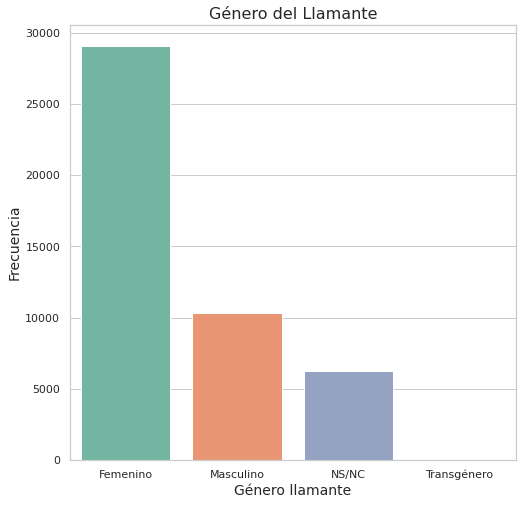

In [55]:
fig = plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_genero",
    order=linea137_df["llamante_genero"].value_counts().index,
)

plt.xlabel("Género llamante", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Género del Llamante", size=16)
plt.show()


In [56]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales: \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "Femenino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por una persona de género Femenino. \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "Masculino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por una persona de género Masculino. \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% sin datos. \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "Transgénero"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por una persona de género Transgénero.",
)


De las 45703 llamadas totales: 
 - 63.69 % fueron hechas por una persona de género Femenino. 
 - 22.61 % fueron hechas por una persona de género Masculino. 
 - 13.64 % sin datos. 
 - 0.07 % fueron hechas por una persona de género Transgénero.


>**Observación:**
>
>- Se puede ver en el gráfico que la gran mayoría de las llamadas son hechas por el género Femenino y un porcentaje menos al 0% realizado por el género Transgénero
>- La cantidad de llamadas sin datos puede ser que el llamante no quiso revelar su género o no tuvo tiempo suficiente para poder brindar esa información (por factores externos a ellos/as).

<html>
  <h1 align="center";>
  3. Análisis columna <code>llamante_vinculo_ninios_presentes</code>
  </h1>
</html>

Describe el vínculo que tiene la persona que realiza el llamado con niños/as presentes en el hecho

#### Primero vemos qué valores están tomando cada una de las variables.

In [57]:
linea137_df.llamante_vinculo_ninios_presentes.value_counts()


No hay niñas/os       10392
Madre                  8153
Otra/o no familiar     7928
NS/NC                  5971
Sin datos              4888
Otro/a no familiar     2701
Otro familiar          1653
Padre                  1642
Otra/o familiar        1495
Hermano/a               653
Hermana/o               198
Padrastro                29
Name: llamante_vinculo_ninios_presentes, dtype: int64

Se entiende con esta variable que se busca saber en primera instancia si hubo niños presentes en el hecho que origina la llamada, y si lo hubo, qué relación tienen los niños con la persona que llama.
 
Se observan datos sucios, repetidos en distinto orden. 
 
Por lo tanto **homogeneizamos** y **agrupamos** algunas variables en primer lugar.

In [58]:
linea137_df["llamante_vinculo_ninios_presentes"] = linea137_df[
    "llamante_vinculo_ninios_presentes"
].str.capitalize()
mapping = {
    "Otra/o familiar": "Otro/a Familiar",
    "Otro familiar": "Otro/a Familiar",
    "Otro/a no familiar": "Otro/a no Familiar",
    "Otra/o no familiar": "Otro/a no Familiar",
    "Hermana/o": "Hermano/a",
    "Ns/nc": "Sin datos",
}

linea137_df["llamante_vinculo_ninios_presentes"] = linea137_df[
    "llamante_vinculo_ninios_presentes"
].replace(mapping)
linea137_df["llamante_vinculo_ninios_presentes"].unique()


array(['Otro/a no Familiar', 'Sin datos', 'Madre', 'No hay niñas/os',
       'Otro/a Familiar', 'Padre', 'Hermano/a', 'Padrastro'], dtype=object)

Quedando de la siguiente manera los datos un poco más limpios:

In [59]:
linea137_df.llamante_vinculo_ninios_presentes.value_counts()


Sin datos             10859
Otro/a no Familiar    10629
No hay niñas/os       10392
Madre                  8153
Otro/a Familiar        3148
Padre                  1642
Hermano/a               851
Padrastro                29
Name: llamante_vinculo_ninios_presentes, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso **del vínculo del llamante con niñas/os presentes**.

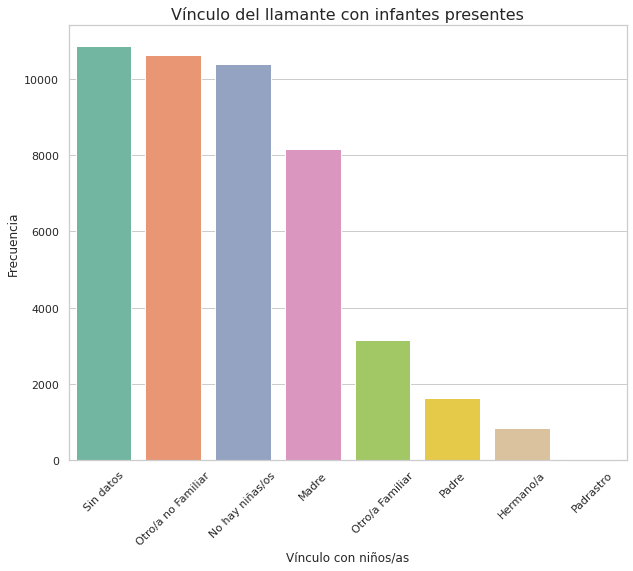

In [60]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_vinculo_ninios_presentes",
    order=linea137_df["llamante_vinculo_ninios_presentes"].value_counts().index,
)

plt.xlabel("Vínculo con niños/as", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Vínculo del llamante con infantes presentes", size=16)
plt.xticks(rotation=45)
plt.show()


In [61]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Sin datos"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% decidió no revelar la relación con niño/a o puede ser que no hubo niño/a presente. \n -",
    round(
        len(
            linea137_df[
                linea137_df["llamante_vinculo_ninios_presentes"] == "Otro/a no Familiar"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por personas no familiares del niñas/os.\n -",
    round(
        len(
            linea137_df[
                linea137_df["llamante_vinculo_ninios_presentes"] == "No hay niñas/os"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas sin niñas/os presentes.\n -",
    round(
        len(linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Madre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por la madre de niñas/os. \n -",

    round(
        len(
            linea137_df[
                linea137_df["llamante_vinculo_ninios_presentes"] == "Otro/a Familiar"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por otro/a familiar de niñas/os.\n -",
    round(
        len(linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Padre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el padre del niñas/os.\n -",
    round(
        len(
            linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Hermano/a"]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el hermano/a del niño/a. \n -",
    round(
        len(
            linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Padrastro"]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el padrastro del niños/as.",
)



De las 45703 llamadas totales:
 - 23.76 % decidió no revelar la relación con niño/a o puede ser que no hubo niño/a presente. 
 - 23.26 % fueron hechas por personas no familiares del niñas/os.
 - 22.74 % fueron hechas sin niñas/os presentes.
 - 17.84 % fueron hechas por la madre de niñas/os. 
 - 6.89 % fueron hechas por otro/a familiar de niñas/os.
 - 3.59 % fueron hechas por el padre del niñas/os.
 - 1.86 % fueron hechas por el hermano/a del niño/a. 
 - 0.06 % fueron hechas por el padrastro del niños/as.


>**Observación:**
>
>- Se puede observar, en primer lugar de los casos el llamante no brindó información sobre si hay niñas/os presentes.
>- En segundo lugar, el llamante no es familiar de las/los niñas/os. 
>- En tercer lugar, el las llamadas directamente no hay niñas/os presentes.
>- En cuarto lugar, el llamante es la madre de las/los niñas/os presentes, en 17.84% de los casos.
>- En cuarto caso, el llamante es otro familiar de las/los niñas/os.
>- El resto de los casos fueron realizados por el padre, hermano/a o el padrastro de los niños/as.





<html>
  <h1 align="center";>
  4. Análisis columna <code>violencia_tipo</code>
  </h1>
</html>

Describe el **tipo de violencia** que se denuncia. Puede tomar los valores:

- Económica y psicológica
- Económica, física y psicológica
- Física y psicológica
- Física, sexual y psicológica
- No aplica
- Psicológica
- Sexual y psicológica
- Sexual, económica y psicológica



#### Primero vemos qué valores están tomando cada una de las variables.

In [62]:
linea137_df.violencia_tipo.value_counts()


Física y psicológica                       21846
Psicológica                                14313
No aplica                                   7435
Física, sexual y psicológica                 390
Económica y psicológica                      389
Económica, física y psicológica              381
No Aplica                                    254
Sexual y psicológica                         250
Otras                                        147
Física, psicológica y económica              143
Económica, Física y psicológica               84
No es un caso de Violencia Familiar           30
Sexual, económica y psicológica               15
Física, sexual, psicológica y económica        6
Name: violencia_tipo, dtype: int64

**Unificamos** algunos datos repetidos.

Primero, hacemos una copia del dataset que estamos trabajando

In [63]:
linea137_copy = linea137_df.copy()


Vamos a realizar un **conteo de frecuencias** de los **tipos de violencia**.

La columna que contiene información sobre los tipos de violencia utilizados es `violencia_tipo`. 

Sus valores son strings con los tipos de violencia separados por comas y con "y". Además unificamos algunos datos repetidos.


In [64]:
relevant_columns = ["violencia_tipo", "index"]


def split_violence(violence_str):
    if not isinstance(violence_str, str):
        return list()

    violence_str = (
        violence_str.title()
        .replace("No Aplica", "No-Aplica")
        .replace("No Es Un Caso De Violencia Familiar", "Otras")
        .replace("Y", "")
    )

    return [lang.strip().replace(",", "") for lang in violence_str.split()]


linea137_copy.loc[:, "tipo_violencia"] = linea137_copy.violencia_tipo.apply(
    split_violence
)

df_violence = (
    linea137_copy.tipo_violencia.apply(pd.Series)
    .stack()
    .reset_index(level=-1, drop=True)
    .to_frame()
    .join(linea137_copy[relevant_columns])
    .rename(columns={0: "tipo_violencia"})
)


In [65]:
df_violence.tipo_violencia.value_counts()

Psicológica    37817
Física         22850
No-Aplica       7689
Económica       1018
Sexual           661
Otras            177
Name: tipo_violencia, dtype: int64

Quedando los datos de la siguiente manera:

In [66]:
df_violence.head()

,tipo_violencia,violencia_tipo,index
0,Física,Física y psicológica,0
0,Psicológica,Física y psicológica,0
1,Física,Física y psicológica,1
1,Psicológica,Física y psicológica,1
2,Física,Física y psicológica,2


Vemos qué valores están tomando cada una de las variables con el nuevo dataframe.

In [67]:
df_violence["tipo_violencia"].value_counts()


Psicológica    37817
Física         22850
No-Aplica       7689
Económica       1018
Sexual           661
Otras            177
Name: tipo_violencia, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada contenedor categórico usando barras, en este caso del **tipo de violencia**.

Text(0.5, 1.0, 'Tipo de Violencia que se Denuncia')

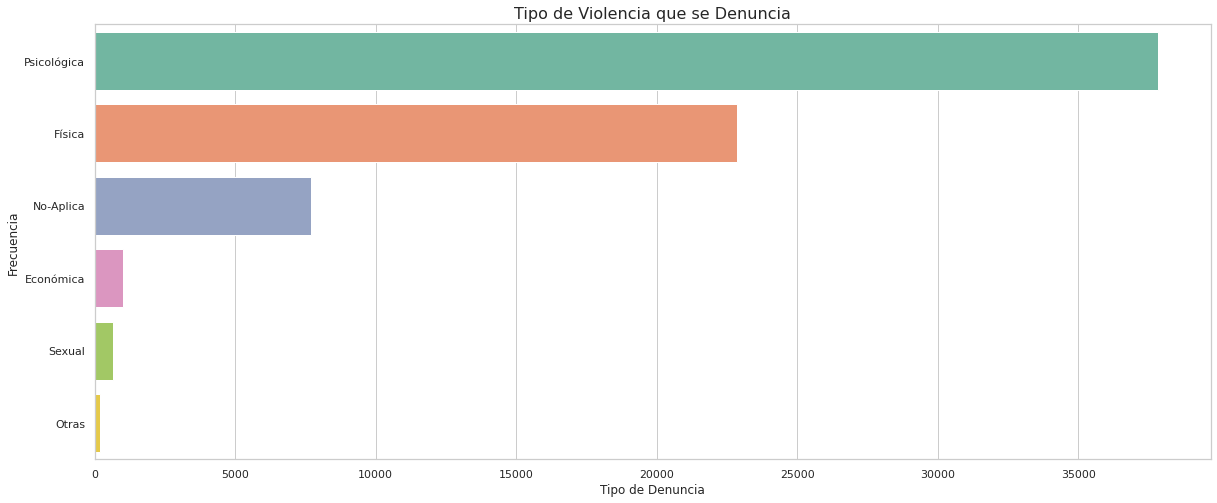

In [68]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    y=df_violence.tipo_violencia,
    order=pd.value_counts(df_violence["tipo_violencia"]).iloc[:20].index,
);
plt.xlabel("Tipo de Denuncia", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Tipo de Violencia que se Denuncia", size=16)


In [69]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Psicológica"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Psicológica.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Física"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Física.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "No-Aplica"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron que no aplica tipo de violencia.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Económica"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Económica.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Sexual"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Sexual.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Otras"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron que es otro tipo de violencia.\n -",
)


De las 45703 llamadas totales:
 - 53.86 % indicaron violencia tipo Psicológica.
 - 32.54 % indicaron violencia tipo Física.
 - 10.95 % indicaron que no aplica tipo de violencia.
 - 1.45 % indicaron violencia tipo Económica.
 - 0.94 % indicaron violencia tipo Sexual.
 - 0.25 % indicaron que es otro tipo de violencia.
 -


>**Observación:**
>
>- Se puede observar una clara predominancia de denuncias por violencia de tipo Psicológica y en segundo lugar el tipo de violencia física.
>- El tercer caso de las llamadas no aplica o indicaron que no es caso de tipo de violencia.
>- En cuarto lugar, la Económica y Sexual tienen menor predominancia de tipo de violencia.
>- Por último lugar, indicaron que es otro tipo de violencia.


<html>
  <h1 align="center";>
  5. Análisis columna <code>victima_genero</code>
  </h1>
</html>

Describe el género de la víctima involucrada en el caso denunciado.

#### Primero vemos qué valores están tomando cada una de las variables.

In [70]:
linea137_df.victima_genero.value_counts()


Femenino       30426
NS/NC          10326
Masculino       4895
Transgénero       56
Name: victima_genero, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso del **género de la víctima**.

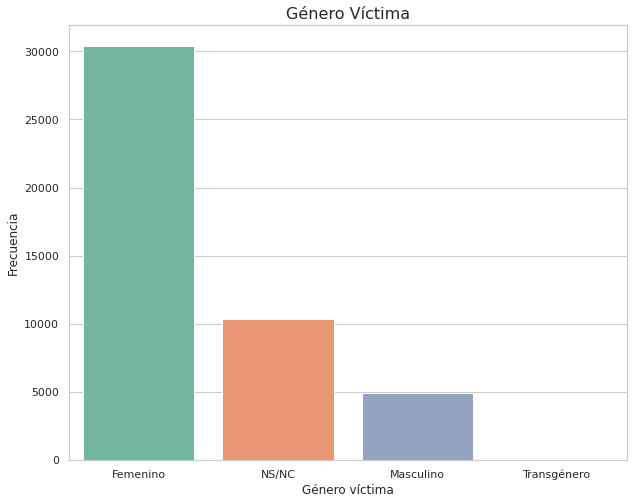

In [71]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="victima_genero",
    order=linea137_df["victima_genero"].value_counts().index,
)

plt.xlabel("Género víctima", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Género Víctima", size=16)
plt.show()


In [72]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "Femenino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la víctima es de género Femenino.\n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% sin datos. \n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "Masculino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la víctima es de género Masculino. \n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "Transgénero"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la víctima es de género Transgénero.",
)


De las 45703 llamadas totales:
 - 66.57 % indicaron que la víctima es de género Femenino.
 - 22.59 % sin datos. 
 - 10.71 % indicaron que la víctima es de género Masculino. 
 - 0.12 % indicaron que la víctima es de género Transgénero.


>**Observación:**
>
>- Se puede ver en esta distribución que en la gran mayoría de las llamadas, la víctima es de género Femenino. 
>- En segundo lugar, hay muchas llamadas que no revelaron su género.
>- En tercer lugar, las víctima es de género Masculino.
>- Y por ultimo lugar, con mucha menor cantidad de llamadas es del género Transgénero 

<html>
  <h1 align="center";>
  6. Análisis columna <code>agresor_genero</code>
  </h1>
</html>

Describe el género del agresor. Puede tomar los valores:

-  Masculino
-  Femenino
-  Trans
-  NS/NC: No sabe / No contesta


In [73]:
linea137_df.agresor_genero.value_counts()


Masculino      28001
NS/NC          10789
Femenino        6899
Transgénero       14
Name: agresor_genero, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada contenedor categórico usando barras, en este caso del **género del agresor**.

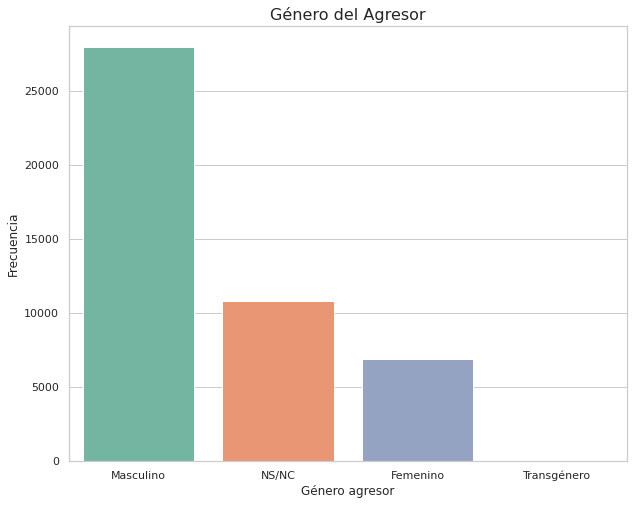

In [74]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="agresor_genero",
    order=linea137_df["agresor_genero"].value_counts().index,
)

plt.xlabel("Género agresor", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Género del Agresor", size=16)
plt.show()



In [75]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "Masculino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es de género Masculino.\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% no indica género del agresor.\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "Femenino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la agresora es de género Femenino.\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "Transgénero"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es de género Transgénero.\n",
)



De las 45703 llamadas totales:
- 61.27 % indicaron que el agresor es de género Masculino.
- 23.61 % no indica género del agresor.
- 15.1 % indicaron que la agresora es de género Femenino.
- 0.03 % indicaron que el agresor es de género Transgénero.



>**Observación:**
>
>- Observamos en esta distribución que en la gran mayoría de las llamadas, el agresor es de género masculino. 
>- En segundo lugar, no hay información sobre el género del agresor.
>- En tercer lugar, una porción mucho menor de agresores es de género femenino. Una situación casi opuesta a la del género de la víctima.
>- En ultimo lugar es agresor es de género Transgénero, con un porcentaje menor al 0%.


<html>
  <h1 align="center";>
  7. Análisis columna <code>agresor_relacion_victima</code>        
  </h1>
</html>

Describe el vínculo que existe entre el agresor y la víctima involucrada en el caso, es decir indica la relación del **agresor** para con su víctima.


#### Primero vemos qué valores están tomando cada una de las variables.

In [76]:
linea137_df.agresor_relacion_victima.value_counts()


Pareja                   11958
NS/NC                    10587
Ex pareja                 8932
Madre                     3875
Padre                     3272
Hijo/a                    2819
Hermano/a                 1526
Otro/a no conviviente     1139
Otro/a conviviente         783
Padrastro                  599
Abuelo/a                   174
Hermana/o                   26
Madrastra                   13
Name: agresor_relacion_victima, dtype: int64

**Unificamos** algunos datos repetidos

In [77]:
linea137_df["agresor_relacion_victima"] = linea137_df[
    "agresor_relacion_victima"
].replace("Hermana/o", "Hermano/a")

linea137_df.agresor_relacion_victima.value_counts()


Pareja                   11958
NS/NC                    10587
Ex pareja                 8932
Madre                     3875
Padre                     3272
Hijo/a                    2819
Hermano/a                 1552
Otro/a no conviviente     1139
Otro/a conviviente         783
Padrastro                  599
Abuelo/a                   174
Madrastra                   13
Name: agresor_relacion_victima, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso de la **Relación con Agresor y la Víctima**.

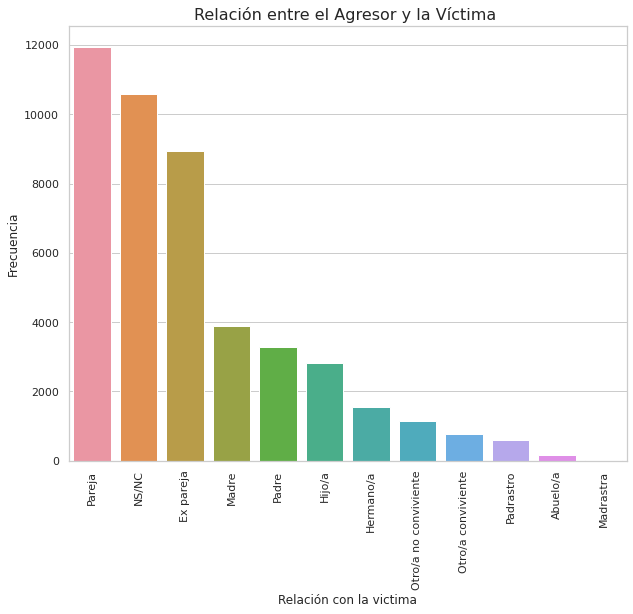

In [78]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="agresor_relacion_victima",
    order=linea137_df["agresor_relacion_victima"].value_counts().index,
)

plt.xlabel("Relación con la victima", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Relación entre el Agresor y la Víctima ", size=16)
plt.xticks(rotation=90)
plt.show()


In [79]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Pareja"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es pareja de la víctima.\n-",

    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Ex pareja"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es ex-pareja de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Madre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es madre de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Padre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es padre de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Hijo/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es hijo/a de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Hermano/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es hermano/a de la víctima.\n-",
    round(
        len(
            linea137_df[
                linea137_df["agresor_relacion_victima"] == "Otro/a no conviviente"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es otro/a no conviviente de la víctima.\n-",
    round(
        len(
            linea137_df[linea137_df["agresor_relacion_victima"] == "Otro/a conviviente"]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es otro/a conviviente de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% no indica relación del agresor con la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Padrastro"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es el padrastro conviviente de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Abuelo/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es abuelo/a conviviente de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Madrastra"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es madrastra de la víctima.\n",
)


De las 45703 llamadas totales:
- 26.16 % indicaron que el agresor es pareja de la víctima.
- 19.54 % indicaron que el agresor es ex-pareja de la víctima.
- 8.48 % indicaron que el agresor es madre de la víctima.
- 7.16 % indicaron que el agresor es padre de la víctima.
- 6.17 % indicaron que el agresor es hijo/a de la víctima.
- 3.4 % indicaron que el agresor es hermano/a de la víctima.
- 2.49 % indicaron que el agresor es otro/a no conviviente de la víctima.
- 1.71 % indicaron que el agresor es otro/a conviviente de la víctima.
- 23.16 % no indica relación del agresor con la víctima.
- 1.31 % indicaron que el agresor es el padrastro conviviente de la víctima.
- 0.38 % indicaron que el agresor es abuelo/a conviviente de la víctima.
- 0.03 % indicaron que el agresor es madrastra de la víctima.



>**Observación:**
>
>- Se puede ver de esta manera que la gran mayoría de los agresores son o pareja actual o ex-parejas.
>- Otra gran porción no hay información sobre la relación, puede ser, por hipótesis que el/la víctima tuvo miedo en revelar su relación con su agresor/a o en la llamada se omitió este campo.

<html>
  <h1 align="center";>
  8. Análisis columna <code>llamado_derivacion</code>
  </h1>
</html>

Acciones que se llevaron a cabo en el centro de llamados de la Línea 137.

#### Primero vemos qué valores están tomando cada una de las variables.

In [80]:
linea137_df.llamado_derivacion.value_counts()


Llamante solicitó información y/o orientación                             22284
La víctima no aceptó la intervención del Equipo Móvil                      5185
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA       4495
Se trata de un conflicto familiar                                          3735
Comunicación con Equipos Móviles                                           2953
No había móviles y/o Equipos para realizar la intervención                 2248
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s     2121
Se planificó intervención para otro momento                                 926
Comunicación con los Equipos Móviles                                        915
Está interviniendo o se deriva a otra institución                           779
Otras                                                                        62
Name: llamado_derivacion, dtype: int64

**Unificación** de los datos repetidos

In [81]:
linea137_df["llamado_derivacion"] = linea137_df["llamado_derivacion"].replace(
    "Comunicación con Equipos Móviles", "Comunicación con los Equipos Móviles"
)

linea137_df.llamado_derivacion.value_counts()


Llamante solicitó información y/o orientación                             22284
La víctima no aceptó la intervención del Equipo Móvil                      5185
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA       4495
Comunicación con los Equipos Móviles                                       3868
Se trata de un conflicto familiar                                          3735
No había móviles y/o Equipos para realizar la intervención                 2248
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s     2121
Se planificó intervención para otro momento                                 926
Está interviniendo o se deriva a otra institución                           779
Otras                                                                        62
Name: llamado_derivacion, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso de las **acciones realizadas en el centro de llamados a la Línea 137**.

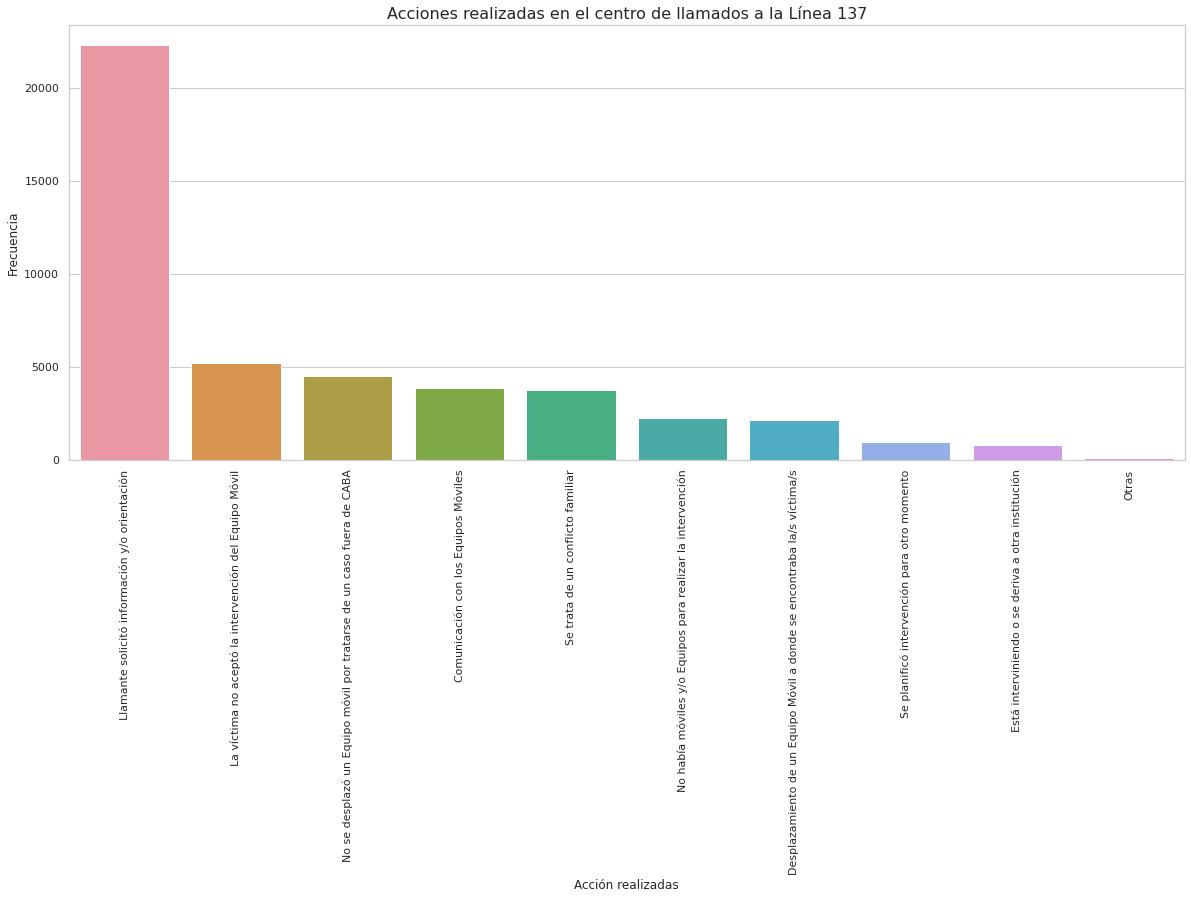

In [82]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamado_derivacion",
    order=linea137_df["llamado_derivacion"].value_counts().index,
)

plt.xlabel("Acción realizadas", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Acciones realizadas en el centro de llamados a la Línea 137", size=16)
plt.xticks(rotation=90)
plt.show()


In [83]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales: \n-",
    round(
        len(
            linea137_df[
                linea137_df["llamado_derivacion"]
                == "Llamante solicitó información y/o orientación"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron sólo para pedir información u orientación, sin generar ninguna acción por parte del personal del 137 o policial.\n- Por otro lado,",
    len(
        linea137_df[
            linea137_df["llamado_derivacion"]
            == "La víctima no aceptó la intervención del Equipo Móvil"
        ]
    ),
    "llamantes, es decir",
    round(
        len(
            linea137_df[
                linea137_df["llamado_derivacion"]
                == "La víctima no aceptó la intervención del Equipo Móvil"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "%, no aceptan la intervención, aunque se haya considerado necesaria.",
)



De las 45703 llamadas totales: 
- 48.76 % fueron sólo para pedir información u orientación, sin generar ninguna acción por parte del personal del 137 o policial.
- Por otro lado, 5185 llamantes, es decir 11.34 %, no aceptan la intervención, aunque se haya considerado necesaria.


>**Observación:**
>
>- En la gran mayoría de los casos no se genera ninguna acción concreta luego de la llamada, sino el llamante sólo pide información y/o orientación respecto a alguna determinada situación.
>- Luego hay varios casos en los que se solicita algún tipo de intervención, o en los que se sugiere intervención pero la víctima no lo acepta.
 



<html>
<hr>
  <h1 align="center";>
  Variable Aleatoria Numéricas
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>victima_cantidad</code> 
  </h1>
</html>

#### Primero vemos qué valores están tomando cada una de las variables.

In [84]:
linea137_df["victima_cantidad"].describe().round(2)


count    45703.00
mean         1.37
std          1.19
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         13.00
Name: victima_cantidad, dtype: float64

In [85]:
linea137_df["victima_cantidad"].value_counts()


1     23556
0      8161
2      7192
3      4091
4      1689
5       605
6       242
7        91
8        41
9        14
10       13
11        4
13        2
12        2
Name: victima_cantidad, dtype: int64

La **Media** y **Mediana**:




In [86]:
print(
    "La media de victima_cantidad es de: ",
    round(linea137_df["victima_cantidad"].mean(), 4),
)
print(
    "La mediana de victima_cantidad es de: ", linea137_df["victima_cantidad"].median()
)
print(
    "El % de victima_cantidad, en donde el valor es 0, es de:",
    round(
        len(linea137_df[linea137_df["victima_cantidad"] == 0]) / len(linea137_df) * 100,
        2,
    ),
    "%",
)



La media de victima_cantidad es de:  1.3732
La mediana de victima_cantidad es de:  1.0
El % de victima_cantidad, en donde el valor es 0, es de: 17.86 %


Graficamos el **histograma** de frecuencia con media y mediana indicada.

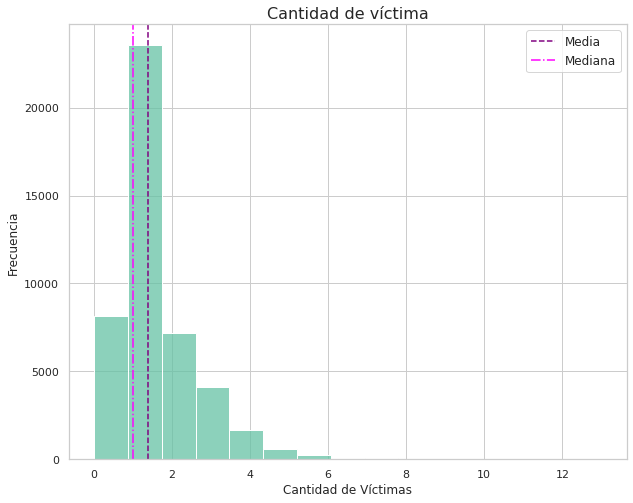

In [87]:
fig = plt.figure(figsize=(10, 8))

sns.histplot(linea137_df["victima_cantidad"], bins=15, palette="Set2")

plt.axvline(
    x=linea137_df.victima_cantidad.mean(),
    linestyle="--",
    color="purple",
    label="Media"
)

plt.axvline(
    x=linea137_df.victima_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)
plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Víctimas", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Cantidad de víctima", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()


>**Observación:**
>
>- En la gran mayoría de los casos, la víctima es una sola.

<html>
  <h1 align="center";>
  2. Análisis columna <code>agresor_cantidad</code>    
  </h1>
</html>

Describe el número de agresores involucrados en el caso

#### Primero vemos qué valores están tomando cada una de las variables.

In [88]:
linea137_df["agresor_cantidad"].describe().round(2)


count    45703.00
mean         0.88
std          0.56
min          0.00
25%          1.00
50%          1.00
75%          1.00
max         51.00
Name: agresor_cantidad, dtype: float64

In [89]:
linea137_df["agresor_cantidad"].value_counts()


1     34839
0      8302
2      2260
3       226
4        58
5        15
51        1
7         1
6         1
Name: agresor_cantidad, dtype: int64

La **Media** y **Mediana**:

In [90]:
print(
    "La media de victima_cantidad es de: ",
    round(linea137_df["agresor_cantidad"].mean(), 4),
)
print(
    "La mediana de victima_cantidad es de: ", linea137_df["agresor_cantidad"].median()
)
print(
    "El % de victima_cantidad, en donde el valor es 0, es de:",
    round(
        len(linea137_df[linea137_df["agresor_cantidad"] == 0]) / len(linea137_df) * 100,
        2,
    ),
    "%",
)


La media de victima_cantidad es de:  0.8841
La mediana de victima_cantidad es de:  1.0
El % de victima_cantidad, en donde el valor es 0, es de: 18.17 %


Graficamos el **histograma** de frecuencia con media y mediana indicada.

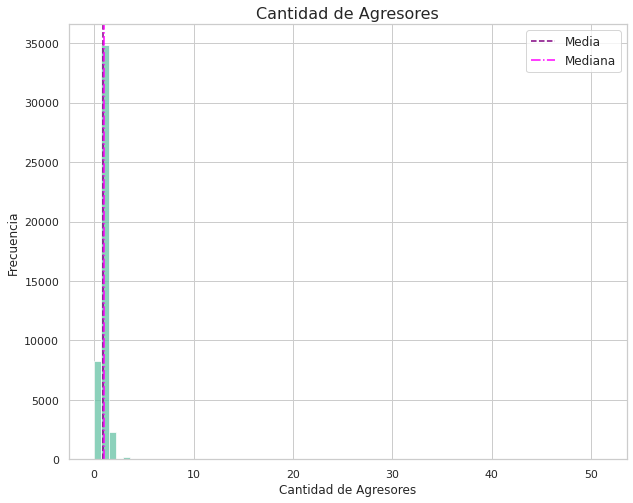

In [91]:
fig = plt.figure(figsize=(10, 8))

sns.histplot(linea137_df["agresor_cantidad"], bins=70, palette="Set2")

plt.axvline(
    x=linea137_df.agresor_cantidad.mean(),
    linestyle="--",
    color="purple",
    label="Media"
)

plt.axvline(
    x=linea137_df.agresor_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)
plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Agresores", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Cantidad de Agresores", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()



**Observación:**
>- En la gran mayoría de los casos el agresor es uno solo.

<html>
<hr>
  <h1 align="center";>
  Variables Temporales
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>llamado_fecha</code>
  </h1>
</html>

Fecha en la que se realiza el llamado

In [92]:
linea137_df.dtypes

index                                 object
caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
dtype: object

Como se observa, la columna `llamado_fecha` es de tipo "object", se procederá a cambiar el tipo de datos.

In [93]:
linea137_df["llamado_fecha"] = pd.to_datetime(
    linea137_df["llamado_fecha"], format="%Y-%m-%d"
)

linea137_df.llamado_fecha.head()

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: llamado_fecha, dtype: datetime64[ns]

Verificamos si las fechas obtienen su formato correspondiente

In [94]:
linea137_df.dtypes


index                                        object
caso_id                                     float64
llamante_descripcion                         object
llamante_genero                              object
llamante_vinculo_ninios_presentes            object
violencia_tipo                               object
victima_genero                               object
victima_cantidad                              int64
agresor_cantidad                              int64
agresor_genero                               object
agresor_relacion_victima                     object
llamado_derivacion                           object
llamado_fecha                        datetime64[ns]
llamado_hora                                 object
dtype: object


<html>
<hr>
  <h1 align="center";>
  Relaciones relevantes
  </h1>
  <hr>
</html>

Luego de analizar las variables de manera individual para conocer un poco mas los datos, nos interesa explorar las relaciones entre:

a. **Género víctima** versus **Género agresor**

b. **Llamante** y **derivación** de la llamada

c. **Cantidad de víctimas** versus **Cantidad de agresores**


<html>
  <h1 align="center";>
  a. Género Víctima vs Género Agresor
  </h1>
</html>

Creamos una tabla de contingencia entre wl **genero de la víctima** y el **género del agresor**

In [95]:
victima_agresor = pd.crosstab(
    linea137_df.agresor_genero, linea137_df.victima_genero
)
victima_agresor


victima_genero,Femenino,Masculino,NS/NC,Transgénero
agresor_genero,,,,
Femenino,4215,2250,420,14
Masculino,25072,2255,639,35
NS/NC,1132,387,9266,4
Transgénero,7,3,1,3


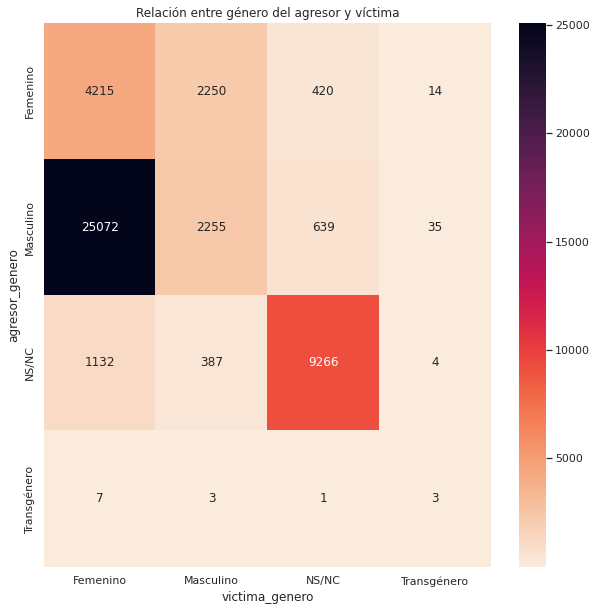

In [96]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(victima_agresor, annot=True, fmt="g", cmap="rocket_r")
plt.title("Relación entre género del agresor y víctima")
plt.show()


>**Observación:**
>
> Se observa que en la gran mayoría de los casos, la **víctima** es **femenina** y el **agresor** **masculino**.

<html>
  <h1 align="center";>
  b. Llamante y derivación de la llamada
  </h1>
</html>

#### Analizamos el llamante de género y su derivación.

Con **crosstab** calculamos la tabla de frecuencia de las columnas `llamado_derivacion` y `llamante_genero`

In [97]:
gen = pd.crosstab(linea137_df["llamado_derivacion"],
                  linea137_df["llamante_genero"])
gen


llamante_genero,Femenino,Masculino,NS/NC,Transgénero
llamado_derivacion,,,,
Comunicación con los Equipos Móviles,21,4,3843,0
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,1465,565,91,0
Está interviniendo o se deriva a otra institución,609,162,8,0
La víctima no aceptó la intervención del Equipo Móvil,3316,1838,25,6
Llamante solicitó información y/o orientación,15593,4960,1718,13
No había móviles y/o Equipos para realizar la intervención,1490,744,14,0
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,3591,835,65,4
Otras,3,1,58,0
Se planificó intervención para otro momento,654,262,10,0


Creamos un gráfico **heatmap** que nos compare las frecuencias de las dos columnas, donde el color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

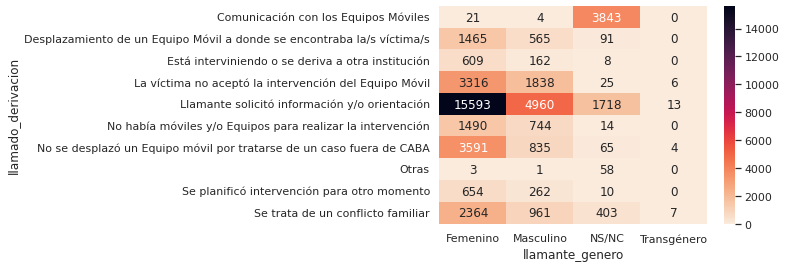

In [98]:
sns.heatmap(gen, annot=True, fmt="d", cmap="rocket_r");


Creamos una gráfica de conteo con  `catplot` que nos muestra el número de observaciones en cada categoría de su variable, en este caso el de `llamante_genero` y `llamado_derivación`. 

Para el gráfico de conteo, configuramos el parámetro kind para contar (`count`).

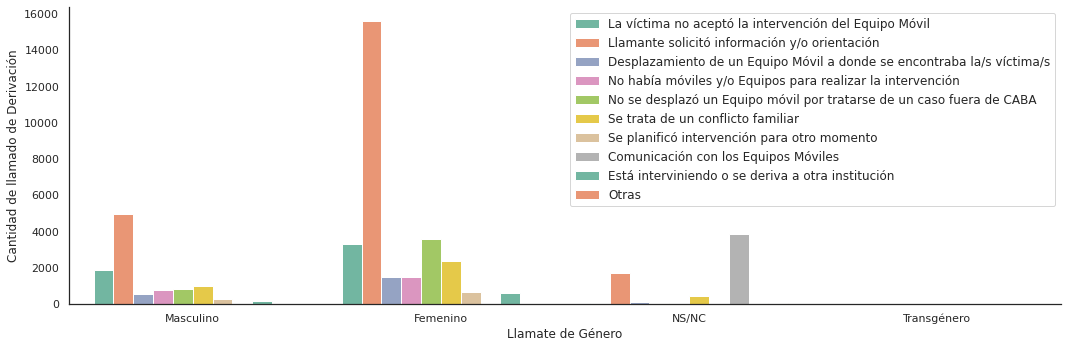

In [99]:
with sns.axes_style("white"):
    g = sns.catplot(
        x="llamante_genero",
        data=linea137_df,
        aspect=3.0,
        kind="count",
        palette="Set2",
        hue="llamado_derivacion",
        legend=False,
    )
    g.set_ylabels("Cantidad de llamado de Derivación")
    g.set_xlabels("Llamate de Género")
    plt.legend(loc="upper right", prop={"size": "medium"})
    sns.despine()
    plt.show()


En el gráfico anterior observamos los datos **NS/NC** y **Transgénero** de la columna `llamante_genero`  no se logra observar la relación existente con la columna `llamado_derivacion`.

Para ello, vamos a utilizar **crosstab** y **heatmap** para visualizar esas variables categóricas.

In [100]:
orden = ['Transgénero', 'NS/NC']
gen = pd.crosstab(linea137_df["llamado_derivacion"],
                  linea137_df["llamante_genero"])[orden]
gen 

llamante_genero,Transgénero,NS/NC
llamado_derivacion,,
Comunicación con los Equipos Móviles,0,3843
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,0,91
Está interviniendo o se deriva a otra institución,0,8
La víctima no aceptó la intervención del Equipo Móvil,6,25
Llamante solicitó información y/o orientación,13,1718
No había móviles y/o Equipos para realizar la intervención,0,14
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,4,65
Otras,0,58
Se planificó intervención para otro momento,0,10


Creamos un gráfico que nos compare las frecuencias de las dos columnas  donde el color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

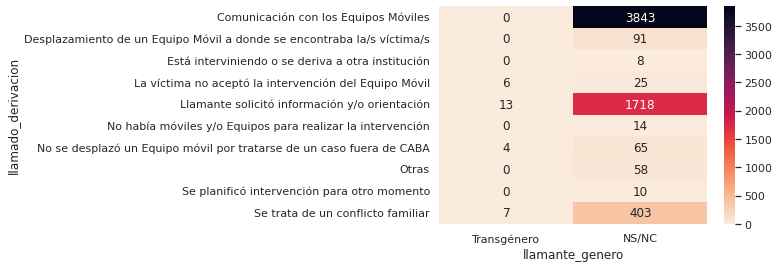

In [101]:
sns.heatmap(gen, annot=True, fmt="d", cmap="rocket_r");


**Observación:**
>- 13 el/la llamante solicitó información y/o orientación
>- 7 la llamada se trató de un conflicto familiar
>- 4 no se desplazó un Equipo Móvil por tratarse de un caso fuera de CABA.
>
>Para el caso de personas que respondieron como género **NS/NC**:
>- La mayoría de los casos solicitó comunicación con los Equipos Móviles 
>- El o la llamante solicitó información y/o orientación 
>- Se trató de un conflicto familiar.


Por último, analizamos los dos datos con **mayor cantidad de frecuencia** y realizamos el gráfico con **heatmap** para comparar las frecuencias de las dos columnas pero con los datos de llamante género **Femenino** y llamante género **Masculino**. 


In [102]:
orden = ['Femenino', 'Masculino']
gen = pd.crosstab(linea137_df["llamado_derivacion"],
                  linea137_df["llamante_genero"])[orden]
gen 

llamante_genero,Femenino,Masculino
llamado_derivacion,,
Comunicación con los Equipos Móviles,21,4
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,1465,565
Está interviniendo o se deriva a otra institución,609,162
La víctima no aceptó la intervención del Equipo Móvil,3316,1838
Llamante solicitó información y/o orientación,15593,4960
No había móviles y/o Equipos para realizar la intervención,1490,744
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,3591,835
Otras,3,1
Se planificó intervención para otro momento,654,262


Analizamos con el gráfico **heatmap** que nos compare las frecuencias de las dos columnas pero con los datos del llamante género **Femenino** y llamante género **Masculino** con relación a la derivación del llamado. 


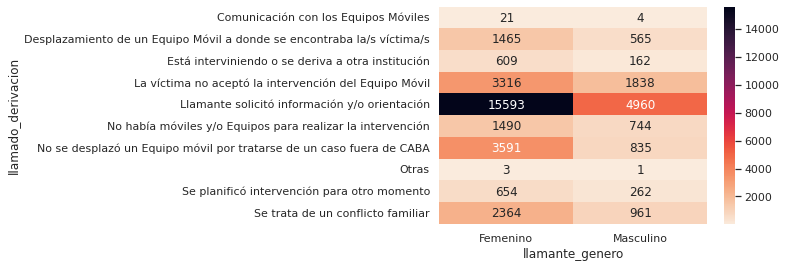

In [103]:
sns.heatmap(gen, annot=True, fmt="d", cmap="rocket_r");


>**Observación:**
>
>- La mayoría de las derivaciónes son realizadas por el género Femenino donde el mayor caso la llamante solicitó información y/o orientación. 
>- La mayoria de las llamadas realizadas por el género Masculino y Transgénero solicitó información y/o orientación.  

<html>
  <h1 align="center";>
  c. Cantidad de víctimas vs Cantidad de agresores
  </h1>
</html>

Para tener un pantallazo de los datos, vamos a calcular el rango de las variables.

Calcularemos el valor mínimo, el máximo, el rango, algunos percentiles, así como el rango intercuartílico para cada una de las variables.

Además, utilizaremos el método `unique()` para conocer los valores posibles de cada variable.

In [104]:
cols = ["victima_cantidad", "agresor_cantidad"]

ranges = pd.DataFrame()
ranges["min"] = linea137_df[cols].min()
ranges["max"] = linea137_df[cols].max()
ranges["std"] = linea137_df[cols].std()
ranges["range"] = ranges["max"] - ranges["min"]
ranges["q25"] = linea137_df[cols].quantile(0.25)
ranges["q50"] = linea137_df[cols].quantile(0.50)
ranges["q70"] = linea137_df[cols].quantile(0.70)
ranges["q75"] = linea137_df[cols].quantile(0.75)
ranges["range_intercuartil"] = ranges["q75"] - ranges["q25"]
ranges["count"] = linea137_df[cols].count()
ranges


,min,max,std,range,q25,q50,q70,q75,range_intercuartil,count
victima_cantidad,0,13,1.187485,13,1.0,1.0,2.0,2.0,1.0,45703
agresor_cantidad,0,51,0.556932,51,1.0,1.0,1.0,1.0,0.0,45703


Vemos que hay un **outlier**, valor 51, el cual procedemos a eliminar

In [105]:
linea137_limpia_df = linea137_df[(linea137_df.agresor_cantidad < 51)]


Realizamos una **Tabla de contingencia**

In [106]:
victima_agresor = pd.crosstab(
    linea137_limpia_df.victima_cantidad, linea137_limpia_df.agresor_cantidad
)
victima_agresor


agresor_cantidad,0,1,2,3,4,5,6,7
victima_cantidad,,,,,,,,
0,7992,154,12,1,1,1,0,0
1,191,21839,1346,133,37,8,1,0
2,71,6605,464,44,6,1,0,1
3,27,3776,260,21,6,1,0,0
4,11,1560,97,15,3,3,0,0
5,5,545,48,6,1,0,0,0
6,2,213,20,4,3,0,0,0
7,2,80,8,1,0,0,0,0
8,1,38,2,0,0,0,0,0


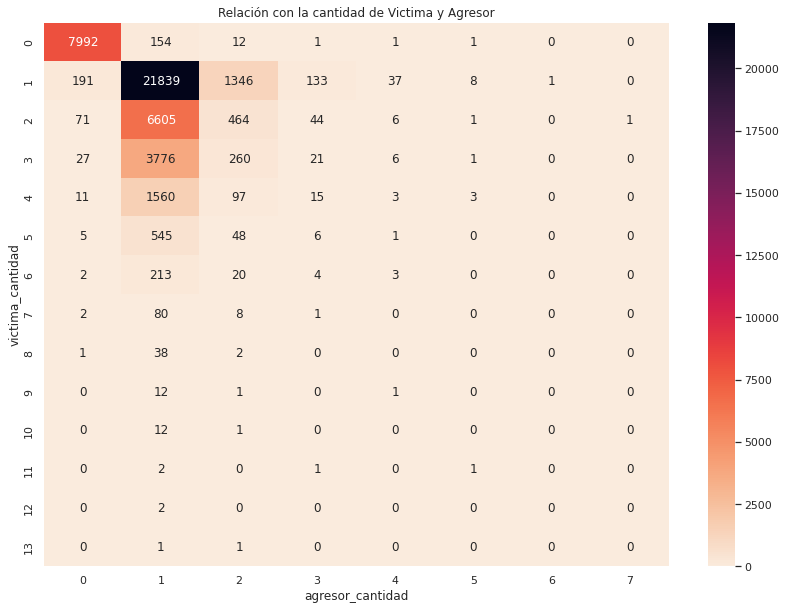

In [107]:
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(victima_agresor, annot=True, fmt="g", cmap="rocket_r")
plt.title("Relación con la cantidad de Victima y Agresor")
plt.show()


In [108]:
[linea137_limpia_df.victima_cantidad.unique()] + [linea137_limpia_df.agresor_cantidad.unique()]


[array([ 3,  2,  1,  4,  6,  0,  5,  7,  8, 10,  9, 11, 13, 12]),
 array([1, 0, 3, 2, 4, 5, 7, 6])]

Podemos hacer tambien un análisis de la cantidad máxima de agresores y de víctimas a los largo de los años, se tiene en cuenta que el 2022 tendrá menos datos debido a que es el año en curso.



Se crea una nueva columna, solo con los años.

In [109]:
linea137_limpia_df["llamado_fecha_anio"] = pd.to_datetime(
    linea137_limpia_df["llamado_fecha"]
).dt.year;


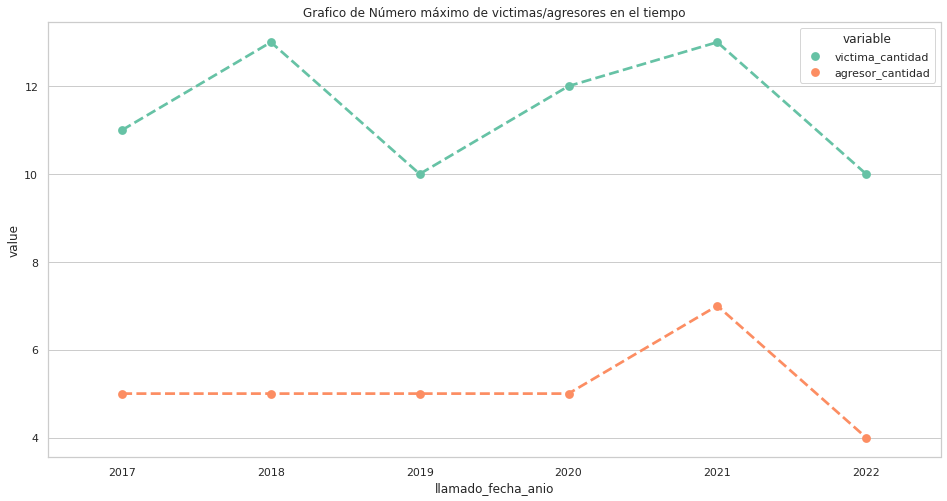

In [110]:
fig = plt.figure(figsize=(16, 8))
data = linea137_limpia_df[
    ["llamado_fecha_anio", "victima_cantidad", "agresor_cantidad"]
]

sp1 = plt.subplot(1, 1, 1)
sp1.set_title("Grafico de Número máximo de victimas/agresores en el tiempo")
sns.pointplot(
    x="llamado_fecha_anio",
    y="value",
    data=pd.melt(
        data, ["llamado_fecha_anio"], ["victima_cantidad", "agresor_cantidad"]
    ),
    hue="variable",
    ci=None,
    estimator=numpy.max,
    markers="o",
    linestyles="--",
    ax=sp1,
)
plt.show();


>**Observación:**
>
>- Se observa que para la cantidad máxima de agresores, hubo un salto importante en el año 2021, además se puede ver que hay una mayor cantidad de víctimas que de agresores.
>- Se puede tener información de la media de la cantidad de víctimas y agresores, que se corresponde con el cálculo del rango de valores que se realizó anteriormente


Es interesante también observar la relación **Víctima/Agresor**, teniendo en cuenta el **género de la Víctima**

<Figure size 1152x576 with 0 Axes>

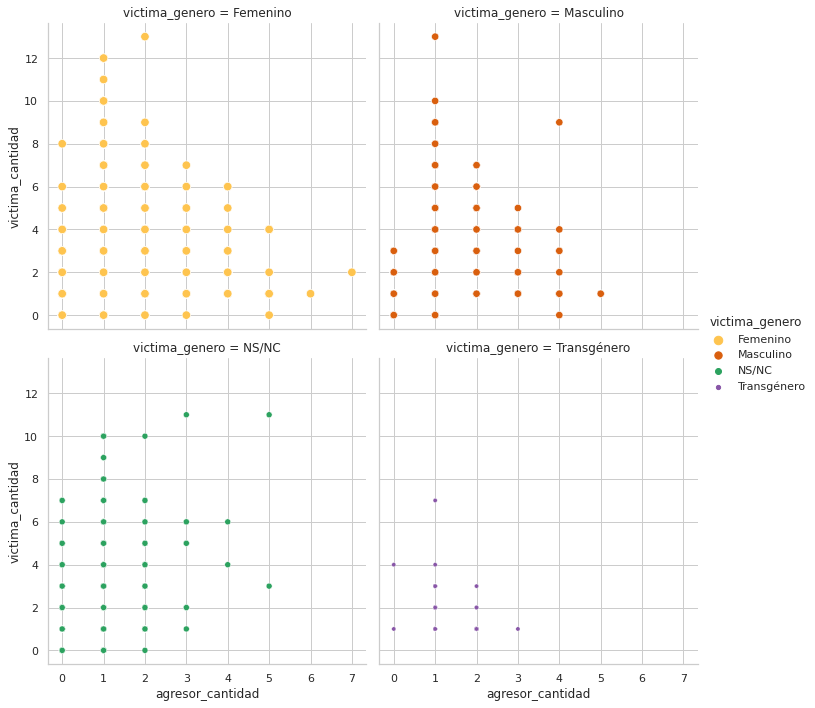

In [111]:
fig = plt.figure(figsize=(16, 8))
hue_colors = {
    "Femenino": "#fec44f",
    "Masculino": "#d95f0e",
    "NS/NC": "#2ca25f",
    "Transgénero": "#8856a7",
}
# Se definen los colores que van a representar a cada categoria

sns.relplot(
    x="agresor_cantidad",
    y="victima_cantidad",
    data=linea137_limpia_df,
    kind="scatter",
    col="victima_genero",
    col_wrap=2,
    palette=hue_colors,
    hue="victima_genero",
    size="victima_genero",
)
plt.show();


**Observación:**
>- Se puede ver que en general, hay una mayor cantidad de víctimas de género Femenino y la relación más predominante de víctima/agresor es de uno a uno.

<html>
<hr>
  <h1 align="center";>
  Conclusión
  </h1>
  <hr>
</html>

Nos encontramos frente a una base de datos de información recopilada or profesionales de la línea 137 de Víctimas de Violencia Familiar, desde Enero 2017 hasta Febrero 2022.

La base de datos obtenida contiene la información de un total de 45703 llamadas en el período mencionado y se dispone en ella de 13 columnas con datos:

- `llamante_descripcion`
- `llamante_genero`
- `llamante_vinculo_ninios_presentes`
- `violencia_tipo`
- `victima_genero`
- `agresor_genero`
- `agresor_relacion_victima`
- `llamado_derivacion`
- `victima_cantidad`
- `agresor_cantidad`
- `fecha`

Por el momento no se analizaron la siguiente columnas:

- `hora de la llamada`

El propósito es conocer un poco los datos, detectar outliers, y empezar a explorar relaciones entre los mismos.

Al analizar los datos se observa de manera resumida lo siguiente:

- La mayoría de las llamadas a la Línea 137 son hechas por las mismas víctimas que son predominantemente del género femenino. Respecto al involucramiento o no de niñas/os en estos casos, se observa una distribución semejante entre niñas/os que son hijos del llamante, casos en los que se desconoce si hay niñas/os, y casos en los que se conoce que no hay niñas/os involucrados o presentes en los hechos denunciados.

- La violencia denunciada suele ser física y psicológica y el agresor, más frecuentemente de género masculino, suele ser la pareja o ex-pareja de la víctima.

- La mayoría de las llamadas no llevan a ninguna acción por parte de la Línea 137 o de la policía, sino que se centran en el pedido de información u orientación. Por lo general hay una única víctima y un único agresor.

<html>
<hr>
  <h1 align="center";>
  Guardamos <code>csv</code>
  </h1>
  <hr>
</html>

Guardamos el dataset que utilizamos en un nuevo `csv` para trabajar en la próxima notebook

In [112]:
linea137_df.to_csv("linea137.csv", index=None)

Descargamos el nuevo dataset

In [113]:
from google.colab import files
files.download('linea137.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>